### 空值处理
dropna()
- axis: {0 或 'index', 1 或 'columns'} – 沿行或列删除
- how: {'any', 'all'} – 'any' 删除有缺失的行，'all' 删除全缺失的行
- thresh: int – 至少保留非缺失值的数量
- subset: list – 指定列","删除包含 NaN 的行。
示例: df_na.dropna(axis=0, how='any') – 删除所有有缺失的行。  

fillna()
- value: scalar 或 dict – 填充值（如 0 或 'Unknown'）
- method: {'ffill', 'bfill'} – 前向/后向填充
- limit: int – 填充上限","用指定值填充 NaN。
示例: df_na.fillna({'Age': df_na['Age'].mean(), 'Salary': 0, 'Department': 'Unknown'})  

ffill() / bfill()
- 无主要参数（返回副本）,"前向/后向填充 NaN。
示例: df_na.ffill(limit=1) – 每列向前填充最多

isnull() / isna(),
- 无主要参数（返回布尔 DataFrame）,"检查缺失值。
示例: df_na.isnull().sum() – 统计每列缺失数。"

replace()：替换指定值

In [1]:
import pandas as pd
import numpy as np
df_na = pd.DataFrame(
    {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, np.nan, 30, 28],
    'Salary': [50000, 60000, np.nan, 55000],
    'Department': ['HR', 'IT', np.nan, 'Finance']
}
)
print(df_na)
def missing_values_table(df):
    mis_val = df.isnull().sum()
    #计算缺失值比例
    mis_val_percent = df.isnull().sum()/len(df) * 100
    mis_val_table = pd.DataFrame({"数量":mis_val, "占比":mis_val_percent})
    mis_val_table_sorted = mis_val_table.sort_values('数量', ascending=False)
    return mis_val_table_sorted

missing_values_table(df_na)


      Name   Age   Salary Department
0    Alice  25.0  50000.0         HR
1      Bob   NaN  60000.0         IT
2  Charlie  30.0      NaN        NaN
3    David  28.0  55000.0    Finance


,数量,占比
Age,1,25.0
Salary,1,25.0
Department,1,25.0
Name,0,0.0


In [11]:
print(df_na.dropna())
df_na
#计算salary并保留一位小数
SaMean = df_na.loc[:, "Salary"].mean()
df_na.fillna(value={"Salary":SaMean}) #将缺失值用均值替换
#使用前面的填充
df_na.fillna(method="bfill") #将缺失值用前面的填充, 返回的是副本（不会影响议案数据)该方法可能会被弃用
df_na.bfill()

    Name   Age   Salary Department
0  Alice  25.0  50000.0         HR
3  David  28.0  55000.0    Finance


C:\Users\25711\AppData\Local\Temp\ipykernel_28796\2153906580.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_na.fillna(method="bfill") #将缺失值用前面的填充, 返回的是副本（不会影响议案数据）


,Name,Age,Salary,Department
0,Alice,25.0,50000.0,HR
1,Bob,30.0,60000.0,IT
2,Charlie,30.0,55000.0,Finance
3,David,28.0,55000.0,Finance


### 重复值处理
drop_duplicates()
- subset: list – 指定列
- keep: {'first', 'last', False} – 保留哪一个重复项,"删除重复行。
示例: df_na.drop_duplicates(subset=['Name', 'Age'], keep='first') – 保留每组重复的第一行。
duplicated()
- subset: list – 指定列
- keep: {'first', 'last', False} – 标记哪一个重复项,"标记重复行。
示例: df_na.duplicated(subset=['Name', 'Age'], keep='first') – 标记每组重复的非第一行。"


In [12]:
print(df_na.duplicated()) #检测重复值
print(df_na.drop_duplicates()) #删除重复值


0    False
1    False
2    False
3    False
dtype: bool

### 异常值检测
常用方法：
- 正太分布3σ原则， 数值分布在(μ-3σ, μ+3σ)之外的点被视为异常值, 在1-3σ中的概论0.6827, 0.9545, 0.9973
- k-近邻（KNN）法
- IQR（四分位距）法, 也叫箱线图法
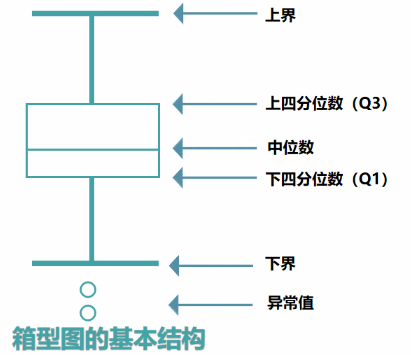
- Z-score（标准分数）法
- DBSCAN（基于密度的空间聚类）法
- Isolation Forest（孤立森林）法

In [17]:
import scipy.stats as stats
data = pd.read_csv(r'data/outlier_data.csv')
u = data['A'].mean()
#计算均值
std = data['A'].std()
stats.kstest(data['A'], 'norm', (u, std)) #检测是否为正态分布


KstestResult(statistic=np.float64(0.39270224380214147), pvalue=np.float64(0.0037560239228238146), statistic_location=np.int64(5), statistic_sign=np.int8(1))

In [ ]:
import numpy as np
def box_outliers(ser):
    # 去掉 NaN 并按值排序，使用位置索引计算四分位数
    s = ser.dropna().sort_values()
    n = s.shape[0]
    if n == 0:
        return s.iloc[0:0]  # 返回空 Series

    mid = n // 2
    if n % 2 == 0:
        Q1 = s.iloc[:mid].median()
        Q3 = s.iloc[mid:].median()
    else:
        Q1 = s.iloc[:mid].median()       # 下半部分（不包括中位数）
        Q3 = s.iloc[mid+1:].median()     # 上半部分（不包括中位数）

    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = ser[(ser < lower) | (ser > upper)]
    return outliers
data = pd.read_csv(r'data/example_data.csv')
box_outliers(data['A'])


5     50
15    23
Name: A, dtype: int64

<Axes: >

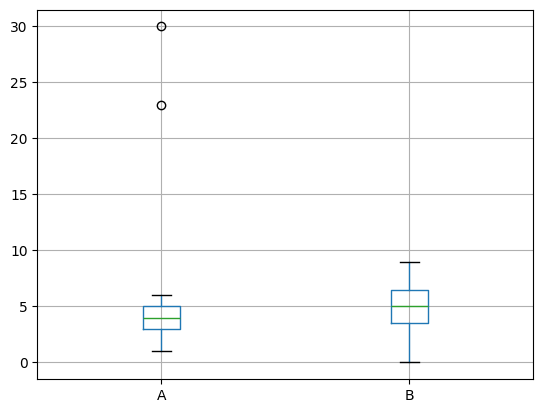

In [24]:
df = pd.read_csv(r'data/outlier_data.csv')
df.boxplot(column=['A', 'B'])

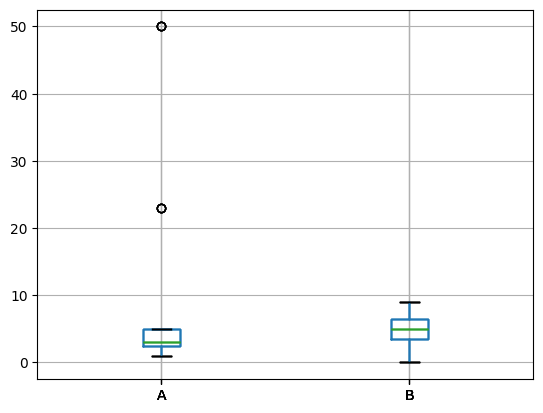

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'data/example_data.csv')
df.boxplot(column=['A', 'B'])
plt.show()

In [49]:
arr = np.array([[1, 2], [3, 4]])
index = np.arange(arr.shape[0])
print(index)
print(arr.shape)

[0 1]
(2, 2)


replace()：替换指定值
df.replace(to_replace={1: 10, 2: 20}) #将所有1替换为10, 2替换为20
df.replace(to_replace=[1, 2], value=[10, 20]) #将所有1替换为10, 2替换为20, 返回副本

In [46]:
#替换多个值
df = pd.read_csv(r'data/example_data.csv')
df.replace(to_replace=[1, 2], value=[10, 20])

,A,B
0,10,20
1,20,3
2,3,8
3,4,5
4,5,6
5,50,7
6,20,8
7,3,9
8,3,0
9,4,3


### 数据类型转换
- astype()：转换数据类型
df['A'] = df['A'].astype(dtype='int') #将A列转换为整数类型
df['B'] = df['B'].astype(dtype='float') #将B列转换为浮点类型
- to_numeric()：将字符串转换为数值
pd.to_numeric(df['A'], errors='coerce') #将A列转换为数值类型, 无法转换的设置为NaN
- to_datetime()：将字符串转换为日期时间
pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce') #将date列转换为日期时间类型, 无法转换的设置为NaT
- to_timedelta()：将字符串转换为时间差
pd.to_timedelta(df['duration'], errors='coerce') #将duration列转换为时间差类型, 无法转换的设置为NaT

In [58]:
import pandas as pd
df = pd. DataFrame({'A': ['1', '1.2', '4.2'],
'B': ['-9', '70', '88'],
'C': ['x', '5.0', '0']})


df['B'] = df['B'].astype(dtype='int') 
df.dtypes

A    object
B     int64
C    object
dtype: object